In [38]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from common_functions import encode_message, decode_message

# TODO: Enable Code formatting
# %load_ext jupyter_black

In [39]:
n = 10000

In [40]:
# Eve tries to guess the bases

In [41]:
# TODO: Nonce generation at the beggining is skipped

In [42]:
# Verifier and Prover generate n random bases a
a_bases = randint(2, size=n)
print("a bases:", a_bases)

# Verifier generates n random challenger-bits c
c_bits = randint(2, size=n)
print("\nc bits:", c_bits)

# Eve guesses the bases
e_bases = randint(2, size=n)
print("\ne bases:", e_bases)

a bases: [0 1 1 ... 0 1 0]

c bits: [0 0 0 ... 0 0 0]

e bases: [0 1 0 ... 1 1 1]


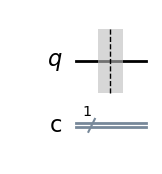

In [43]:
# Encode c in a
message = encode_message(c_bits, a_bases, n)

# Draw the circuit bit 0
message[0].draw(output="mpl")

In [44]:
# Eve decodes the qubits in the guessed bases and store them as c
c_eve = decode_message(message, e_bases, n)
print("\nc measured by P:", c_eve)


c measured by P: [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 

In [45]:
# Eve re-encode the qubits in the guessed bases and sends them to the Verifier
message_back = encode_message(c_eve, e_bases, n)

# Verifier decodes the message in the bases a and store them as c'
c_verifier = decode_message(message_back, a_bases, n)

# Verifier compares c and c'
print(c_eve == c_verifier)

# Loop through each bit of c_eve and c_verifier if they are the same increase the counter and divide the counter by n
counter = 0
for i in range(n):
    if c_eve[i] == c_verifier[i]:
        counter += 1
success_rate = counter / n
print(f"\nEve's success rate: {success_rate:.6f}")


False

Eve's success rate: 0.742600


In [46]:
# TODO: Last step is a MAC check
# TODO: CURRENTLY I SEND ALL OF THE BITS. THEY NEED TO BE SEND ONE BY ONE. SO I NEED LOOP THROUGH IT